In [1]:
import pandas as pd
import numpy as np

# Data cleaning and verification of Integrity

In this project, we will use data provided by UCI machine learning repository (www.archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) to predict if any card holder will default (fail to pay the minimum in then next month

In [2]:
df = pd.read_excel(r'C:\Users\96654\OneDrive\Desktop\datasets\defult_card_info.xls')

First, we have to check the parameters of the data frame (columns and rows) and make sure they are unique.

In [3]:
df.shape #Shows (Rows,Columns)

(30000, 25)

In [4]:
df.columns #Creates an index showing all the column names.

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Now we know the names of columns so lets explain more on what they are:
- LIMIT_BAL: Amount of credit provided 
- including individual consumer credit and the family (supplementary) credit.
- Sex: 1 = male; 2 = female
- EDUCATION: 1 = graduate school; 2 = university; 3 = high school; 4 = others).
- MARRIAGE: Martial status (1= married; 2 = single; 3 = others).
- AGE: age(year).
- PAY_1-PAY_6: Records of payments for 6 months, between April and september. The measurment scale for repayment status is as follows: -1 = pay duly; 1 = payment delay for 1 month and so on. 
- BILL_AMT1-BILL_AMT6: Bill statement amount in NT Dollar. 
- PAY_AMT1-PAY_AMT6: The amount of previous payment (NT dollar). PAY_AMT1 represents the amount payed  in september and so on.

In [5]:
df.head() #Shos the top 5 entres in our data set

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


From the table above we can asume that the ID column contains unique identifiers. But we need to make sure that they are in fact unique:

In [6]:
df['ID'].nunique() #Goes through a series(aka column)abd counts the unique values.

29687

The outpet of **.nunique()** Shows that the number of unique entries is 29,687. Using the shape output earlier in the document we see that there are 30,000 rows in the dataframe. We now know that there are duplications in our ID column which should have been a unique identifier. 

This is not all the info we need to remove said duplications. How much are they duplicated? are the duplications all from one ID? if not how many IDs are duplicated

In [7]:
id_counts = df['ID'].value_counts() #This will list all the unique IDs and how often they are mentiond
id_counts.head() #Will show as the top 5 most mentioned IDs.

7574bf9e-f3f9    2
590a776e-5049    2
1512a948-a7e4    2
85bd7f39-2e9b    2
4cb27699-fe3f    2
Name: ID, dtype: int64

In [8]:
id_counts.value_counts() #Using value_counts we display the number of IDs mentioned once and twice.

1    29374
2      313
Name: ID, dtype: int64

From the information above we understand that IDs are supposed to me mentioned only once. But 313 IDs are dublicated once only. So we know that no ID has more than two entries. Now that we have all the information we need, we can start fixing the data quality issue. 

# Removing duplicates

First we need to create a boolean mask that locates all the duplicated IDs. (A boolean mask aka logic mask is a way to segregate an array based on conditions put by us).

In [9]:
dupe_mask = id_counts == 2
dupe_mask[0:5] #showing the first five elements of the array we created

7574bf9e-f3f9    True
590a776e-5049    True
1512a948-a7e4    True
85bd7f39-2e9b    True
4cb27699-fe3f    True
Name: ID, dtype: bool

Above we see five elements in the `dupe_mask`. According to the condition we set up all of the IDs have been counted twice which means that they were duplicated.

In [10]:
dupe_ids = id_counts.index[dupe_mask] #Here we create a variable containing all the ID names 

In [11]:
dupe_ids = list(dupe_ids) #converting the dupe_id to a list and checking it length
len(dupe_ids)

313

Now we have a list of all the names of duplicated IDs which are 313 names. This also confirms `.value_counts` command which shows 313 IDs were duplicated twice.

In [12]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
6757,7574bf9e-f3f9,30000,1,2,2,24,0,0,0,-1,...,517,25420,24863,1545,0,1517,25420,0,980,0
6857,7574bf9e-f3f9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10171,590a776e-5049,70000,2,2,2,40,0,0,0,0,...,27430,25498,27678,3141,7000,5505,3000,4000,5000,0
10271,590a776e-5049,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12645,1512a948-a7e4,230000,2,2,1,27,0,0,0,0,...,191956,191741,176784,8862,8933,6956,7845,6784,7471,0
12745,1512a948-a7e4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_zero_mask = df == 0

In [14]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [15]:
sum(feature_zero_mask)

315

It looks like there are at least as many "zero rows" as there are duplicate IDs. Let's remove all the rows with all zero features and response, and see if that gets rid of the duplicate IDs.

In [16]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()

In [17]:
df_clean_1.shape


(29685, 25)

Now we have cleaned the dublicated IDs since the shape tool returned the correct amount.

# Cleaning Data Continued Columns: 

In [18]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

The `.info` shows that there are no null values in our columns, but we need to double check if that is correct for safety. 

In [19]:
df_clean_1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


The `.head()` also shows nothing null but still it just shows us a small sample compared to the total amount of 29 thousand.

In [20]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

Using `.value_counts()` funtion we used before in the ID cleaning section we notice that there is infact null value but they are named by the data souce as *Not Available*.

Now that we know what null values are named in our data frame, we can throw at those missing values that were hidin from us in `.info`. 


In [21]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [22]:
sum(valid_pay_1_mask)

26664

In [23]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()
df_clean_2.shape


(26664, 25)

In [24]:
df_clean_2['PAY_1'].value_counts()


 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

Now that `.value_counts()` does not show *Not Available* value shown before. We can sleep knowing our column is cleaned.

In [25]:
df_clean_2[['PAY_1', 'PAY_2']].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PAY_1   26664 non-null  object
 1   PAY_2   26664 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 624.9+ KB


Notice that the column we correct changed types! We also need to make sure our types match. 

In [26]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')

# Exploring our data frame:
Now that we made sure our data frame is cleaned. We can explore our data and understand it. But first we are goingto import the modules that we are going to use. 

In [27]:
import matplotlib.pyplot as plt
#automatic plot rendering
%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 400 #high resolution figures

Now that our modules are set we can start ploting and visualizing our data frame. 

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>]], dtype=object)

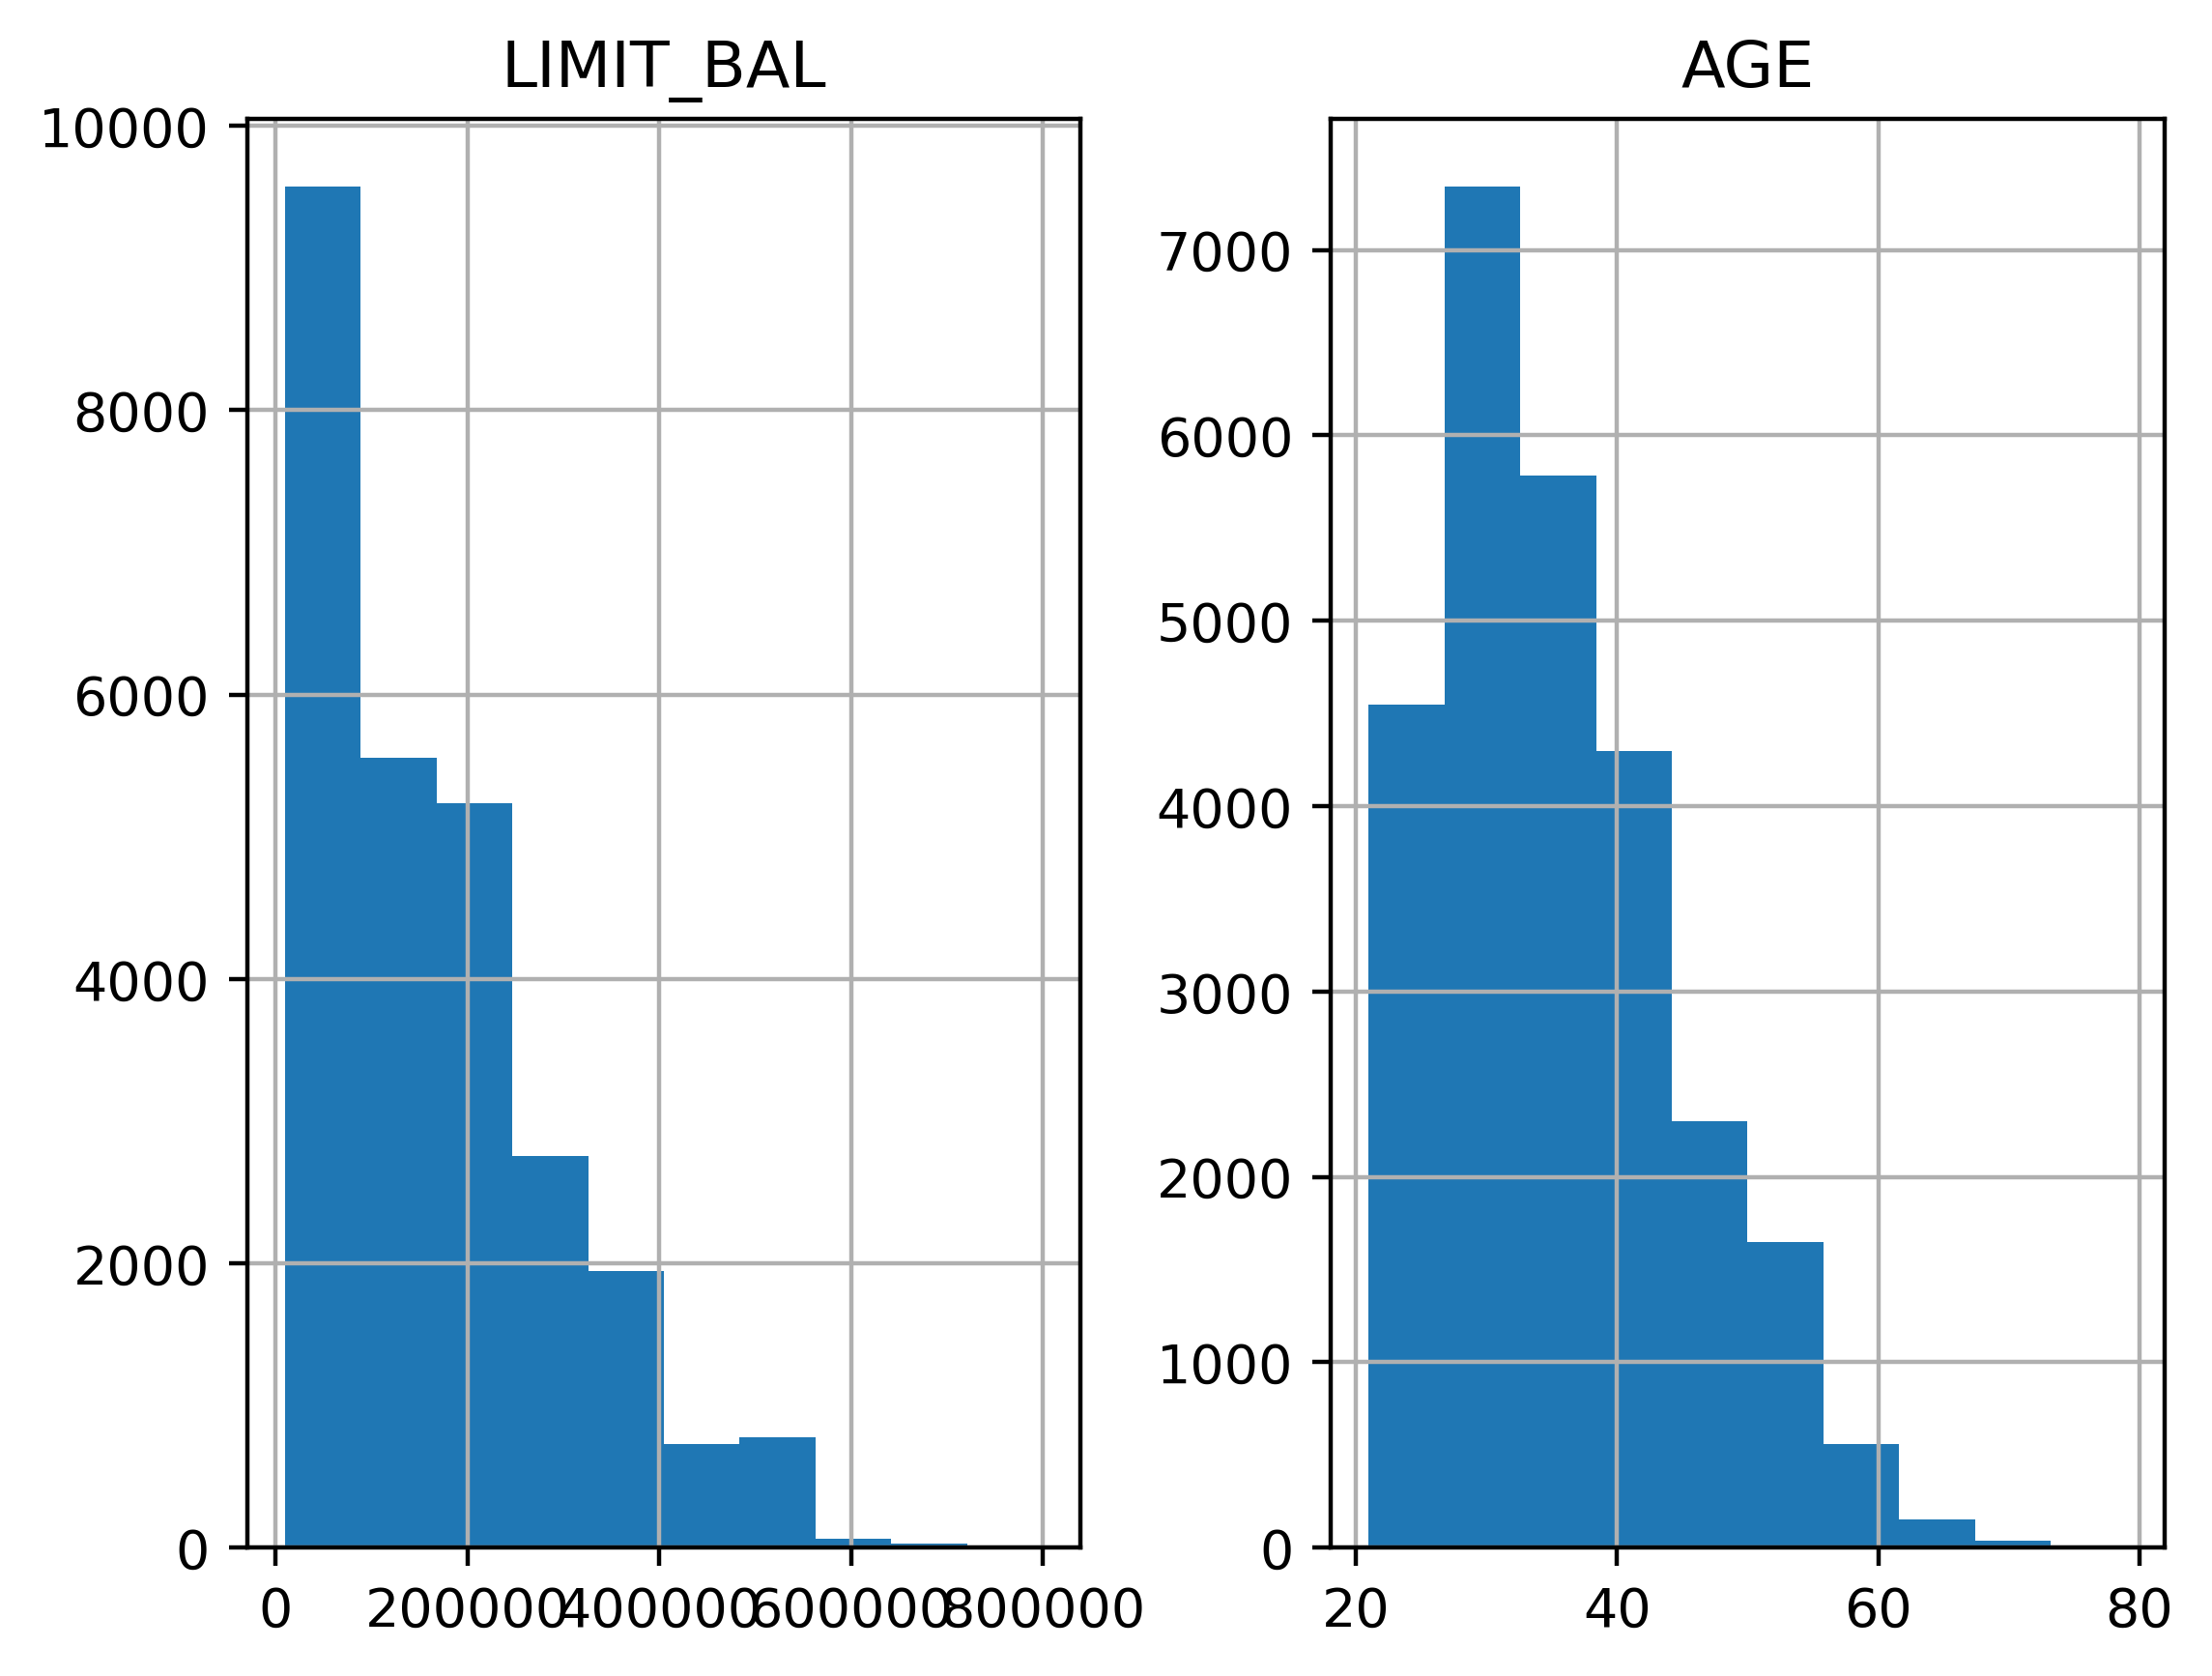

In [28]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [29]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [30]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

We notice in visualizing EDUCATION that it is numbers only! But early in the document we wrote what they mean and catagory number 4 is labled as unkown so we need to replace it. 

In [31]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)

In [32]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [33]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

Here also we notice there is 'unkown' catagory which we need to replace 
(1 = married, 2 = single, 3 = others).

In [34]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)

In [35]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

# Dive into Catagorical Features:
Now we will get into catagorical features for one of our catagories EDUCATION. Lets aggregate our catagory based on education level and default rate for the payments we had by those catagories. We can find the rate using the average of payment next month response vaariable.

Text(0.5, 0, 'Education level: Ordinal enconding')

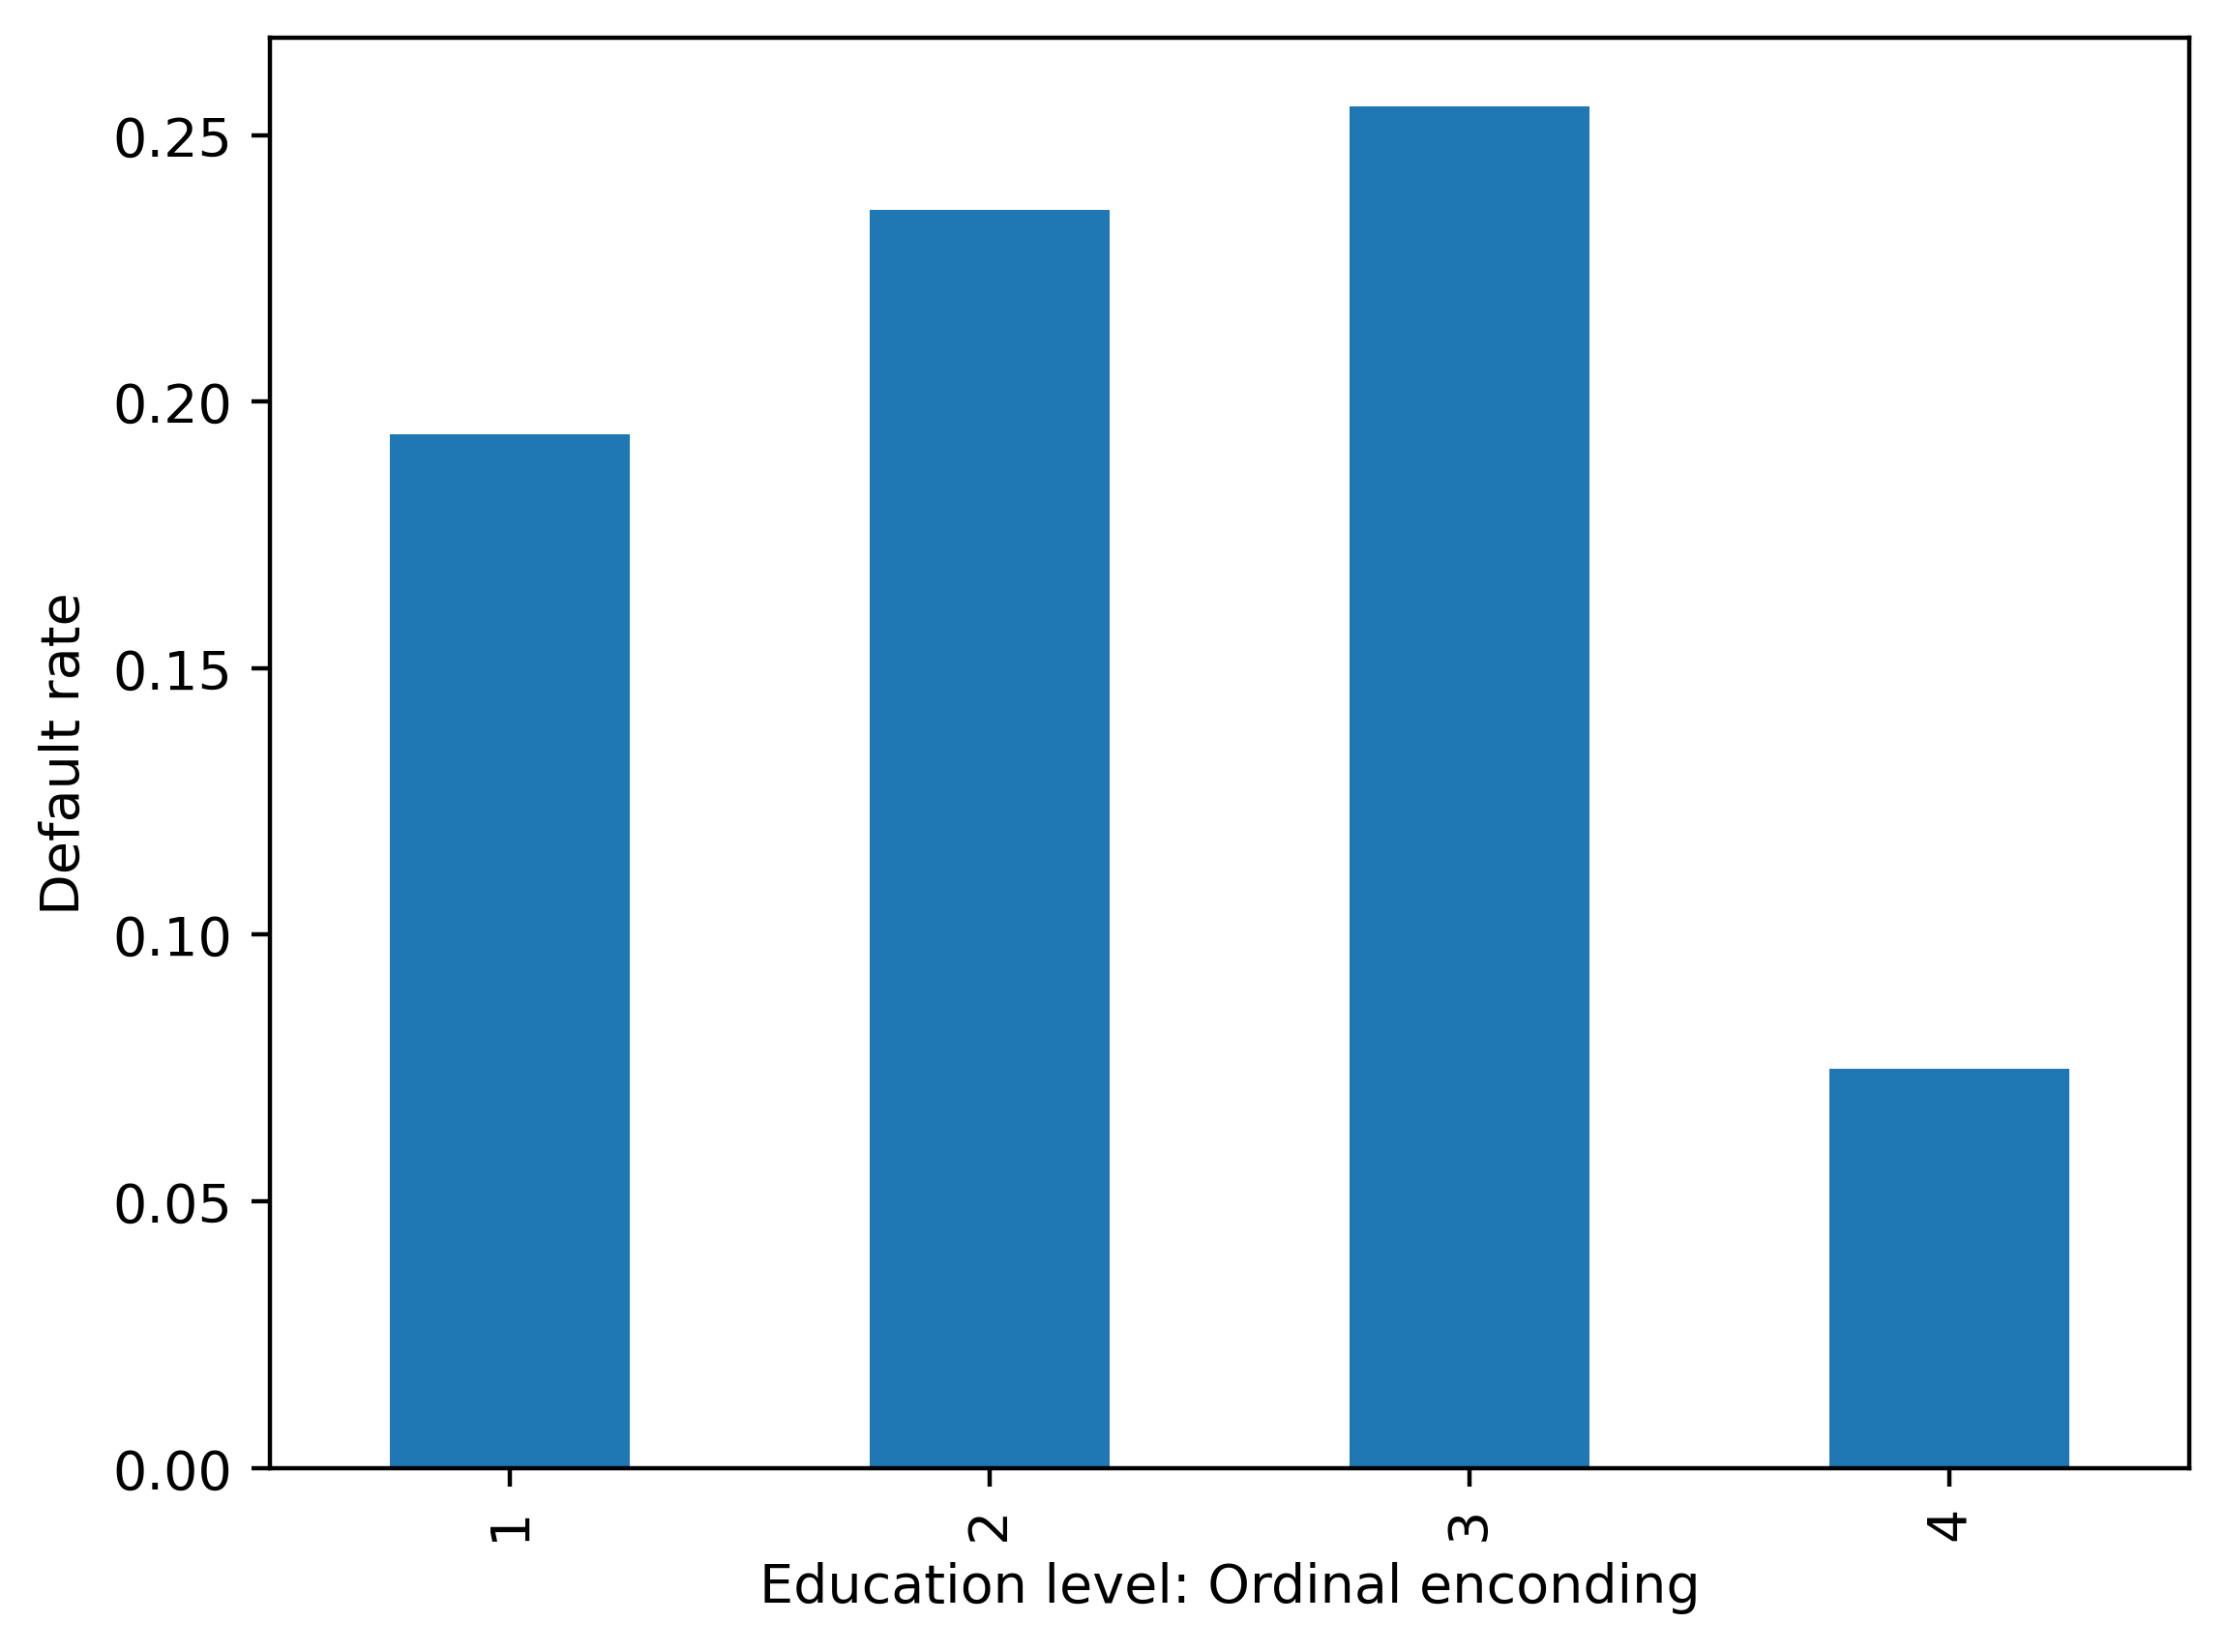

In [36]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: Ordinal enconding')

From the graph above we see that a straight-line fit would not be the best way to descripe the data we have here. We might have a better description to the data by using more complex algoriths like random forest. Or we could use (OHE) one-hot-enconding. 

# OHE and Reverse and Engineering a Feature:
We will reverse engineer the education catagory to obtain the labels that represent the education levels. Then we will use pandas to create an OHE. 

In [38]:
df_clean_2['EDUCATION_CAT'] = 'none' #Creating an empty catagory 

In [39]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


Now that we have our education_cat ready and empty we can start working on reverse engineering our EDUCATION feature. We will use the `.map` that mapps all values of a Series onto a new series. The main goal is to map the numbers in EDUCATION into the correct string that matches the level. 

In [43]:
cat_mapping = {1: 'graduate school',\
               2: 'university',\
               3: 'high school',\
              4: 'others'}
#creating our mapping dictionary

In [44]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


### OHE time:
We will pass the DF to pandas `get_dummies()` function. It is called dummies because the OHE columns are called dummy variables. We will have as many columns as many levels / unique inputes. 

In [46]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


From the table above you can understand why it is called OHE one-hot-encoding. When a 1 is put in a row under a catagory, it should not appear again on the same row. If it does, that means we have an error on our hand so lets check our work by compining two data frames side by side from the original one and edu_ohe. 

In [49]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis = 1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',\
            'high school','university','others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


# Financial History Features 
We have three types of financial catagories in our data frame. 
1. Status of montly payments in last 6 months.
2. Billed amounts in last 6 months.
3. Paid amounts in last 6 months.

We will look at payment status first. 

In [50]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',\
            'PAY_6']

In [52]:
df_clean_2[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


We have values ranging from -2 to 8. Which means 9 is never observed and its called payment delay for nine months or above. 

We will take a look at `value_counts()` of **PAY_1** sorted by values we are counting aka **index** of the series. 

In [55]:
df_clean_2[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

We notice that most of our IDs are between -2, -1, 0. (1 means one month delay, 2 means two month delay and so on.) So we can understand that 0 means they have paid the minimum amount and -2, -1 have not used their credit card for two or one month.

Now we will create a simple histogram to descripe our data frame.

<AxesSubplot:>

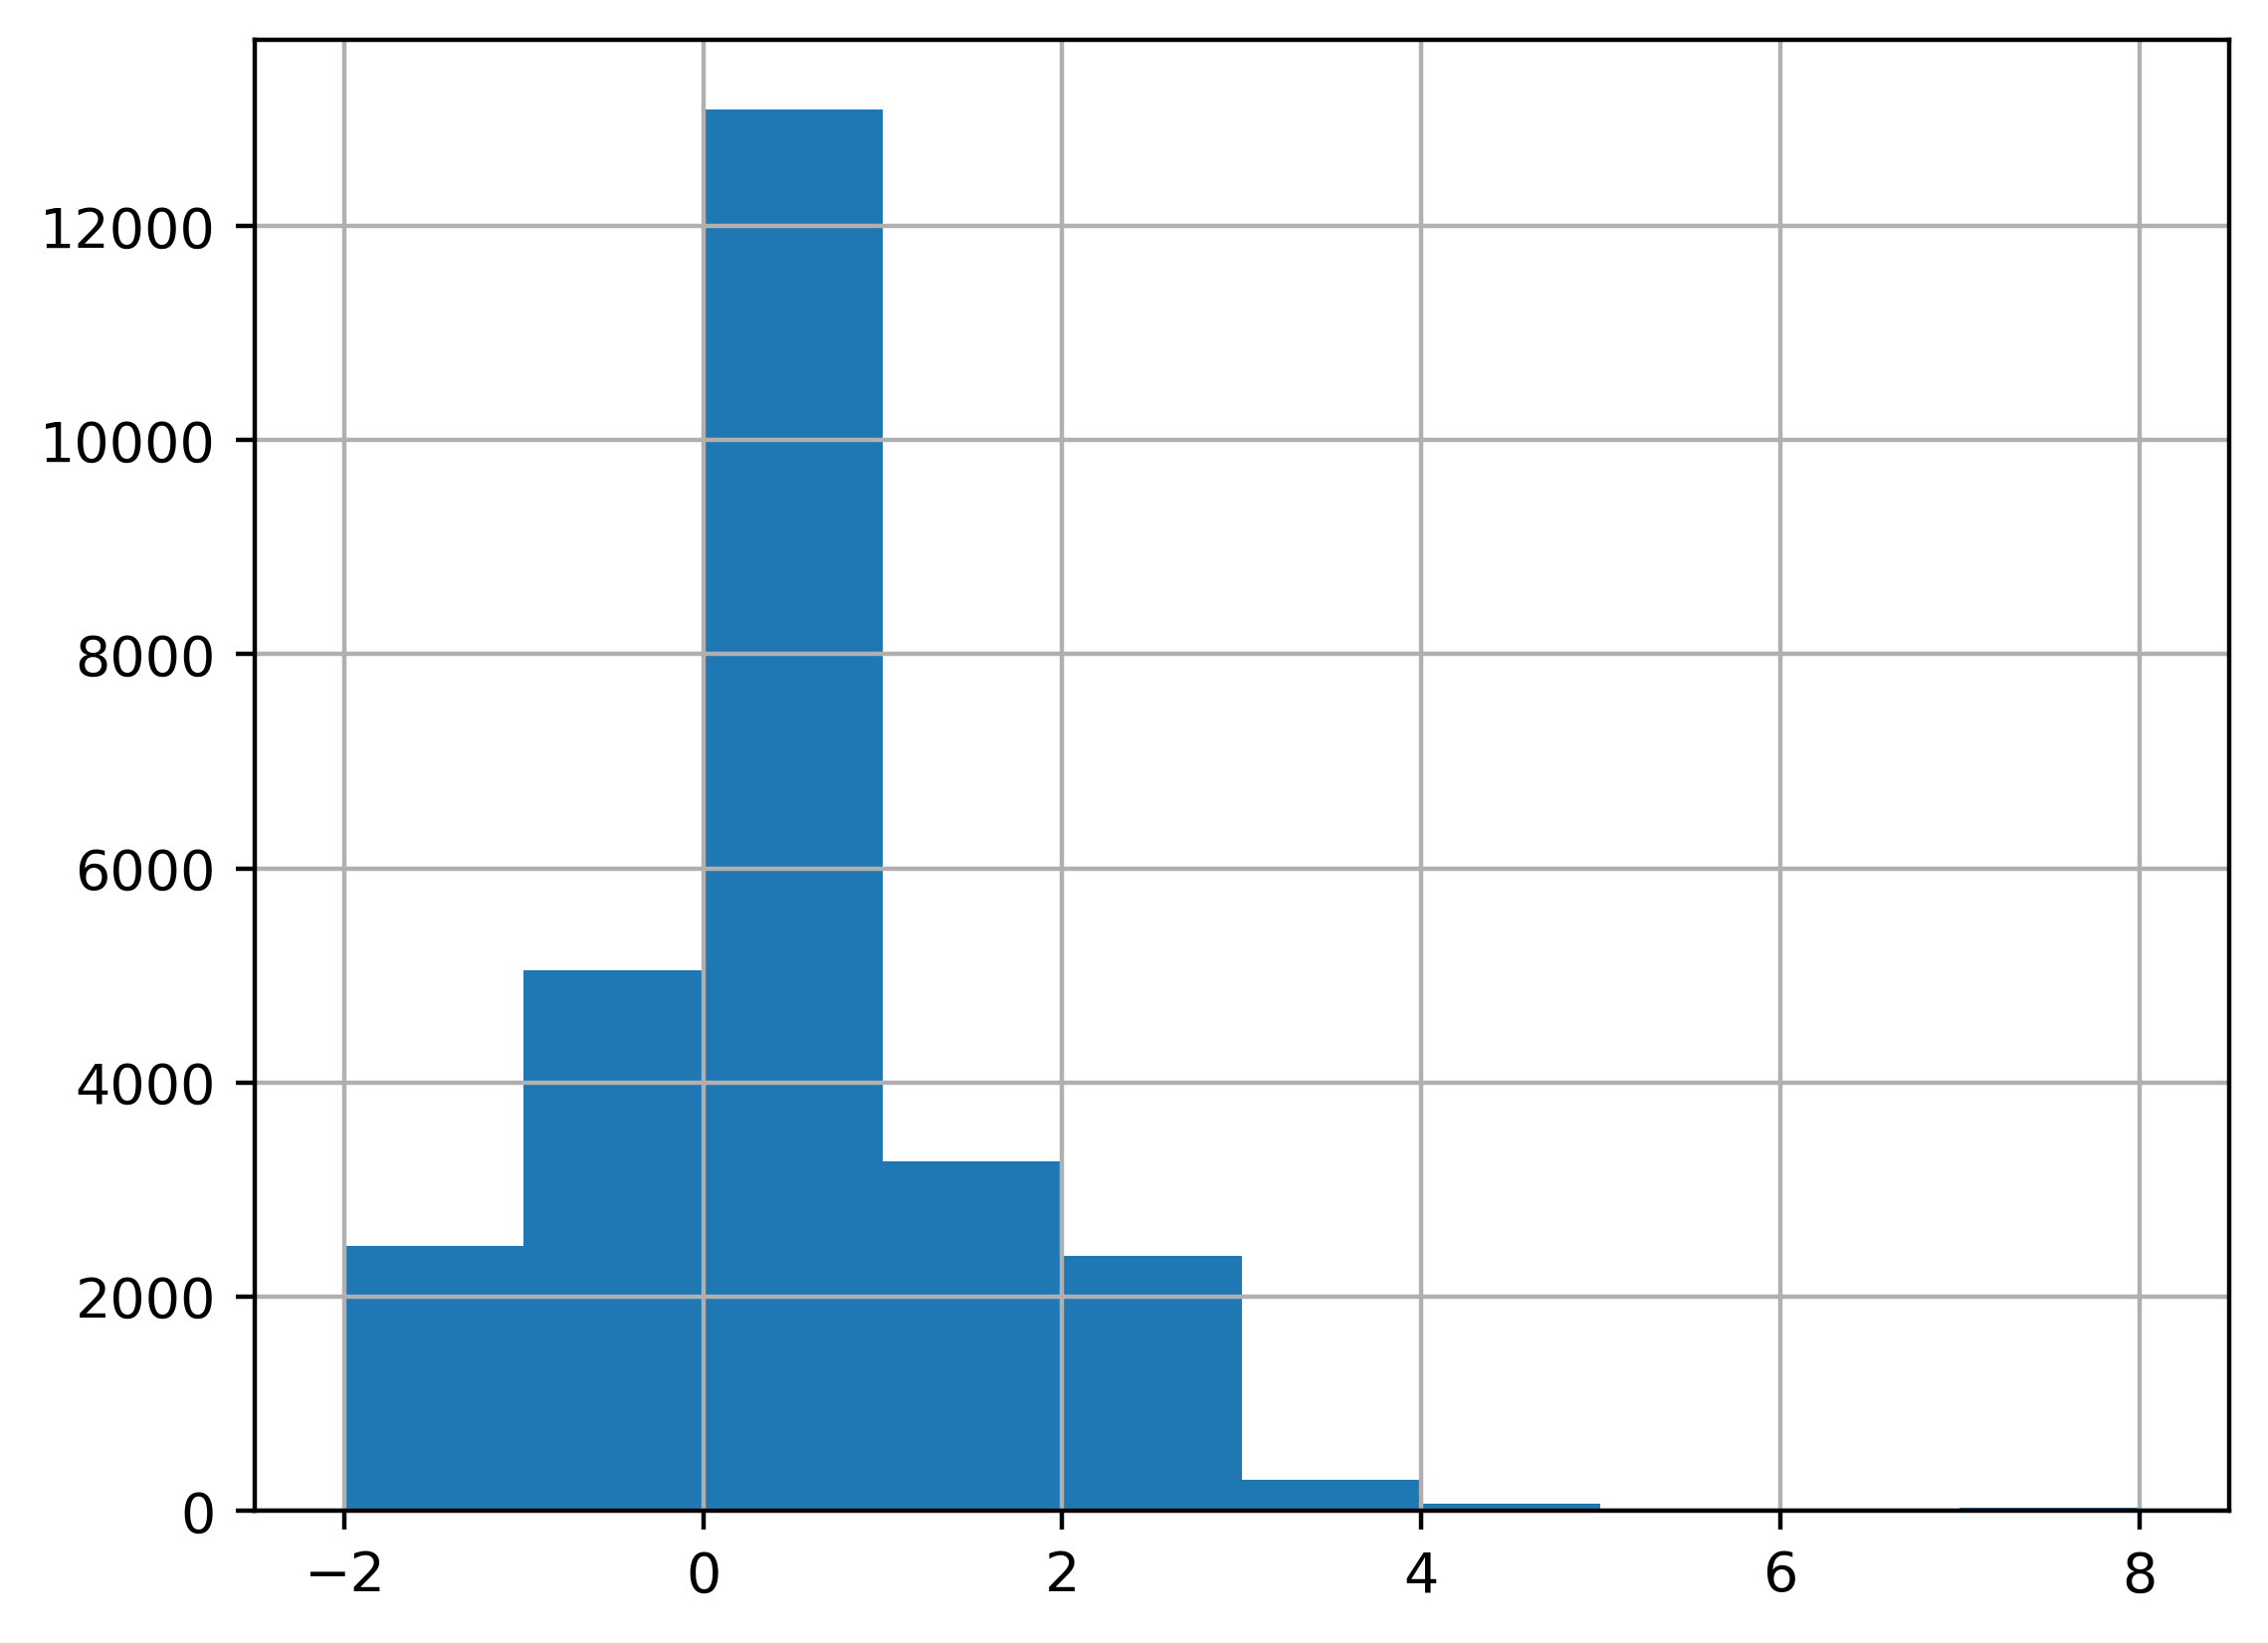

In [57]:
df_clean_2[pay_feats[0]].hist()